In [2]:
import glob
import os
import time
import datetime

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits

from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

In [3]:
def init():
    '''
    Initialise first frame with first image
    '''
    ttl.set_text('')
    tt2.set_text('')
    im.set_array(f(images[0]))
    return (im,)


def f(filename):
    '''
    Frame update function
    '''
    return fits.open(filename)[0].data[0,0,:,:]  


def updatefig(i, *args):
    '''
    Update image data for frame.
    '''
    im.set_array(f(images[i]))
    ttl.set_text(os.path.basename(images[i])[:10])
    tt2.set_text(os.path.basename(images[i])[11:19])
    i += 1
    return im,

In [17]:
# Images to make frames

images = np.array(sorted(glob.glob("/data/imageport_imager/2017-02-25T0[3,4,5]:??:[0,3]0-S*-B*.fits")))
# images = np.append(images, sorted(glob.glob("/data/imageport_parallel/2017-02-25T04:2?:?0-S*-B*.fits")))
# images = np.append(images, sorted(glob.glob("/data/imageport_parallel/2017-02-25T04:3?:?0-S*-B*.fits")))

In [18]:
len(images)

255

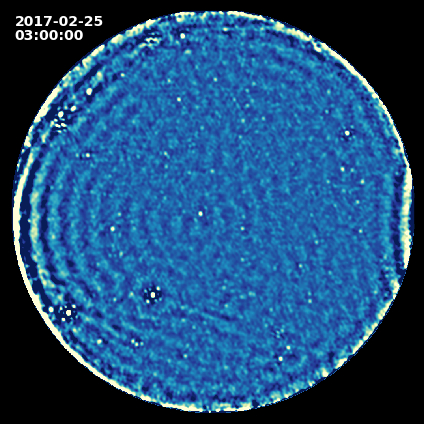

In [19]:
cmap = matplotlib.cm.YlGnBu_r
cmap.set_bad('black')

fig = plt.figure(figsize=(6,6))

plt.xticks([])
plt.yticks([])
plt.rcParams['figure.facecolor'] = 'black'



i = 0
im = plt.imshow(f(images[i]), vmin=-30, vmax = 80, animated=True, cmap=cmap, origin='lower')
ttl = plt.text(10., 985, '', color="white", fontsize=14, weight="bold")
tt2 = plt.text(10., 950, '', color="white", fontsize=14, weight="bold")

plt.tight_layout()

ani = animation.FuncAnimation(fig, updatefig, interval=150, frames=len(images), blit=True)

In [22]:
# Breaks if too large

# HTML(ani.to_html5_video())

In [21]:
#  Save video

t1 = time.time()
ani.save("/home/kuiack/scintillaton_strip.mp4")
print time.time() -  t1, "seconds for", len(images), "frames."

37.8965201378 seconds for 255 frames.
